# Median
The median is the value that separates the higher half from the lower half of a dataset when it's sorted in order. It's the middle point of your data.

- Robust to outliers: Unlike the mean, the median is not affected by extreme values
- Position-based: It only depends on the order of values, not their magnitude
- True "middle" value: Represents the 50th percentile of your data

**When to Choose Median Over Mean**
- Income data - usually right-skewed
- House prices - few expensive outliers
- Response times - occasional very slow responses
- Customer ratings - ordinal data
- Any skewed distribution where outliers would distort the mean

The median gives you a more realistic "typical" value when your data isn't perfectly symmetrical!



## Implementation
You can calculate the median using libraries like NumPy, pandas or the built-in statistics module in Python.


### 1. Using NumPy

In [1]:
import numpy as np

# Basic median calculation
data = [25, 30, 35, 40, 1000]  # Notice the outlier 1000
median_np = np.median(data)
mean_np = np.mean(data)

print(f"Data: {data}")
print(f"NumPy Median: {median_np}")  # 35.0
print(f"NumPy Mean: {mean_np:.2f}")  # 226.00
print(f"Difference: {mean_np - median_np:.2f}")  # 191.00


Data: [25, 30, 35, 40, 1000]
NumPy Median: 35.0
NumPy Mean: 226.00
Difference: 191.00


### 2. Using pandas (for DataFrames/Series)

In [2]:
import pandas as pd
import numpy as np

# Create a DataFrame with salary data
data = {
    'department': ['Engineering', 'Marketing', 'Sales', 'HR', 'Engineering'],
    'salary': [85000, 62000, 58000, 55000, 250000]  # CEO in Engineering
}
df = pd.DataFrame(data)

print("Original DataFrame:")
print(df)

# Calculate median by department
median_by_dept = df.groupby('department')['salary'].median()
mean_by_dept = df.groupby('department')['salary'].mean()

print("\nMedian salary by department:")
print(median_by_dept)

print("\nMean salary by department:")
print(mean_by_dept)

# The Engineering department shows the difference clearly!

Original DataFrame:
    department  salary
0  Engineering   85000
1    Marketing   62000
2        Sales   58000
3           HR   55000
4  Engineering  250000

Median salary by department:
department
Engineering    167500.0
HR              55000.0
Marketing       62000.0
Sales           58000.0
Name: salary, dtype: float64

Mean salary by department:
department
Engineering    167500.0
HR              55000.0
Marketing       62000.0
Sales           58000.0
Name: salary, dtype: float64


### 3. Using statistics

In [3]:
import statistics

data = [25, 30, 35, 40, 1000]

# Basic median
median_stats = statistics.median(data)
print(f"Statistics Median: {median_stats}")  # 35

# For even number of elements
data_even = [25, 30, 35, 40]
median_even = statistics.median(data_even)
print(f"Median (even count): {median_even}")  # 32.5

# Low and high median functions
data_even = [1, 2, 3, 4]
low_median = statistics.median_low(data_even)   # 2
high_median = statistics.median_high(data_even) # 3
regular_median = statistics.median(data_even)   # 2.5

print(f"Low median: {low_median}")
print(f"High median: {high_median}")
print(f"Regular median: {regular_median}")

Statistics Median: 35
Median (even count): 32.5
Low median: 2
High median: 3
Regular median: 2.5


## Real-World Examples

### 1. Housing Prices

Housing Prices: [250, 275, 300, 320, 350, 380, 400, 450, 500, 2500]
Mean Price: $572K
Median Price: $365K


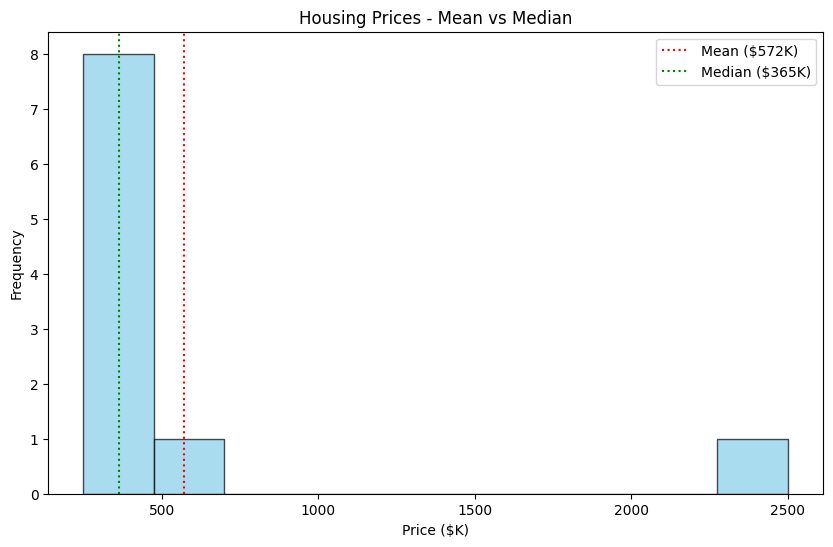

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Housing prices in a neighborhood (in thousands)
# Most houses are affordable, but a few are luxury mansions
prices = [250, 275, 300, 320, 350, 380, 400, 450, 500, 2500]

mean_price = np.mean(prices)
median_price = np.median(prices)

print(f"Housing Prices: {prices}")
print(f"Mean Price: ${mean_price:,.0f}K")    # $572K - misleading!
print(f"Median Price: ${median_price:,.0f}K") # $365K - represents typical home

# Visualization
plt.figure(figsize=(10, 6))
plt.hist(prices, bins=10, alpha=0.7, color='skyblue', edgecolor='black')
plt.axvline(mean_price, color='red', linestyle=':', label=f'Mean (${mean_price:.0f}K)')
plt.axvline(median_price, color='green', linestyle=':', label=f'Median (${median_price:.0f}K)')
plt.xlabel('Price ($K)')
plt.ylabel('Frequency')
plt.title('Housing Prices - Mean vs Median')
plt.legend()
plt.show()


### 2. Income Analysis

In [8]:
import pandas as pd
import numpy as np

# Create sample income data
np.random.seed(42)
normal_incomes = np.random.normal(50000, 15000, 98)  # 98 people with normal incomes
ceo_incomes = [2000000, 1500000]  # 2 CEOs

all_incomes = np.concatenate([normal_incomes, ceo_incomes])

# Create DataFrame
income_df = pd.DataFrame({'income': all_incomes})

# Calculate statistics
stats_summary = {
    'Mean': np.mean(all_incomes),
    'Median': np.median(all_incomes),
    'Standard Deviation': np.std(all_incomes)
}

print("Income Distribution Summary:")
for stat, value in stats_summary.items():
    print(f"{stat}: ${value:,.2f}")

print(f"\nThe mean is ${stats_summary['Mean'] - stats_summary['Median']:,.2f} higher than the median!")
print("This indicates a right-skewed distribution with high-income outliers.")


Income Distribution Summary:
Mean: $82,476.72
Median: $48,592.56
Standard Deviation: $241,207.97

The mean is $33,884.16 higher than the median!
This indicates a right-skewed distribution with high-income outliers.


### 3. Customer Satisfaction Ratings

In [10]:
import numpy as np
from collections import Counter

# Customer ratings on a scale of 1-5
ratings = [1, 1, 2, 3, 3, 3, 4, 4, 4, 4, 4, 5, 5, 5, 5]

mean_rating = np.mean(ratings)
median_rating = np.median(ratings)
mode_rating = max(set(ratings), key=ratings.count)

print(f"Customer Ratings: {ratings}")
print(f"Mean: {mean_rating:.2f}")
print(f"Median: {median_rating}")
print(f"Mode: {mode_rating}")

# Frequency distribution
rating_counts = Counter(ratings)
print("\nRating Frequency:")
for rating in sorted(rating_counts.keys()):
    count = rating_counts[rating]
    percentage = (count / len(ratings)) * 100
    print(f"{rating} stars: {count} times ({percentage:.1f}%)")


Customer Ratings: [1, 1, 2, 3, 3, 3, 4, 4, 4, 4, 4, 5, 5, 5, 5]
Mean: 3.53
Median: 4.0
Mode: 4

Rating Frequency:
1 stars: 2 times (13.3%)
2 stars: 1 times (6.7%)
3 stars: 3 times (20.0%)
4 stars: 5 times (33.3%)
5 stars: 4 times (26.7%)


## Advanced Usage

### 1. Handling Missing Data

In [11]:
import pandas as pd
import numpy as np

# Data with missing values
data_with_nan = [1, 2, 3, np.nan, 5, 6, np.nan, 8]

# pandas automatically handles NaN values
series = pd.Series(data_with_nan)
median_with_nan = series.median()

print(f"Data with NaN: {data_with_nan}")
print(f"Median (ignoring NaN): {median_with_nan}")  # 4.0


Data with NaN: [1, 2, 3, nan, 5, 6, nan, 8]
Median (ignoring NaN): 4.0


### 2. Multi-dimensional Data

In [12]:
import numpy as np

# 2D array example
data_2d = np.array([
    [1, 2, 3, 100],    # row with outlier
    [4, 5, 6, 7],      # normal row
    [8, 9, 10, 11]     # normal row
])

# Median along different axes
median_axis0 = np.median(data_2d, axis=0)  # Column-wise median
median_axis1 = np.median(data_2d, axis=1)  # Row-wise median

print("Original 2D array:")
print(data_2d)
print(f"\nColumn-wise median: {median_axis0}")
print(f"Row-wise median: {median_axis1}")


Original 2D array:
[[  1   2   3 100]
 [  4   5   6   7]
 [  8   9  10  11]]

Column-wise median: [ 4.  5.  6. 11.]
Row-wise median: [2.5 5.5 9.5]
